# Comparing Type Ia SNe by simulated spectral "smear type"

A phenomenon called "smearing" often distorts supernova (SN) spectral observation. We're interested in comparing how two different simulated smear types "smear C11" and "smear G10" affect spectroscopic **selection bias** in a population of supernovae. 

For background on the general "selected" versus "missed" classification problem, see "selection_function.ipynb"

In [1]:
# modules we need for the analysis
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from helper_functions import clean_fitres

In [3]:
labels = ['smearC11' , 'smearG10']
C11_bulk,C11_sel = clean_fitres.makeMLDataframes(labels[0])

G10_bulk,G10_sel = clean_fitres.makeMLDataframes(labels[1])

smearlist = [[C11_bulk, C11_sel], [G10_bulk, G10_sel]]

/mnt/c/Users/lucas/repositories/supernova_classification/helper_functions/clean_fitres.py:14: RuntimeWarning: invalid value encountered in log10
  S2mB = [(-2.5 * np.log10(x0) + 10.6) for x0 in data_all['S2x0']]


In [4]:
C11_bulk;

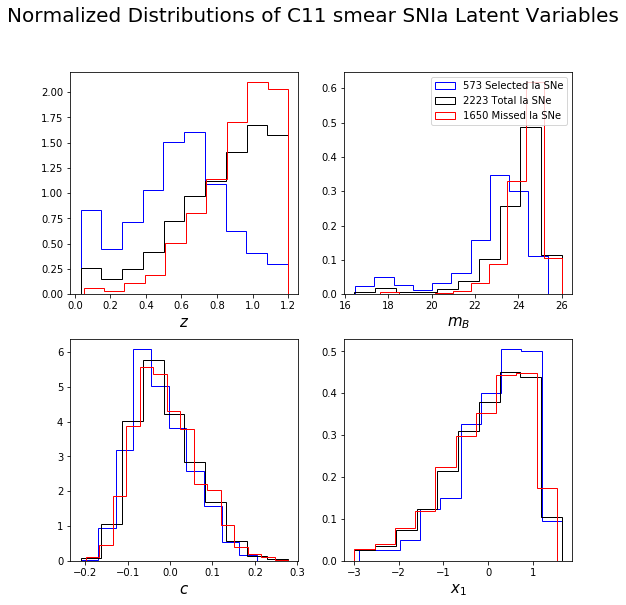

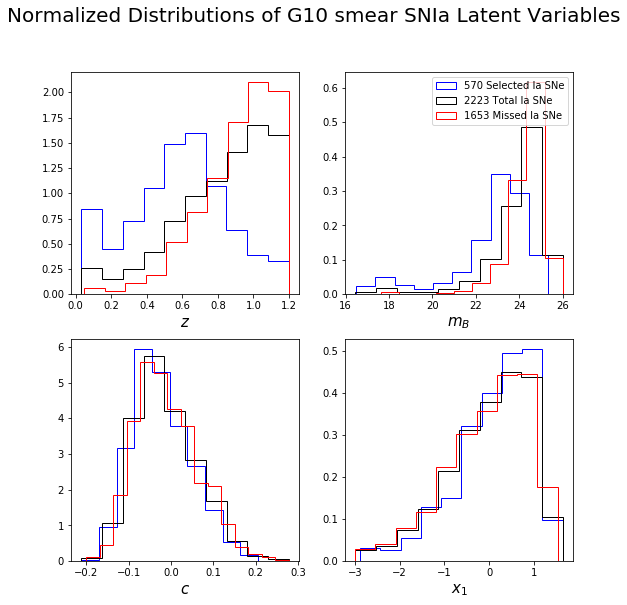

In [5]:
from helper_functions import make_latent_plots
# use our helper function to make plots in a couple of lines of code
# inputs: smear label, bulk_data, sel_data

for i in range(len(labels)):    
    make_latent_plots.makeLatentHistograms(labels[i], data_all=smearlist[i][0], data_sel=smearlist[i][1])

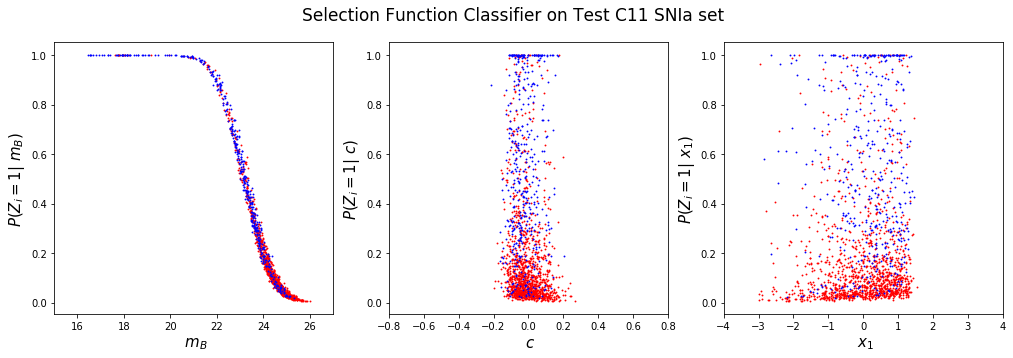

<Figure size 432x288 with 0 Axes>

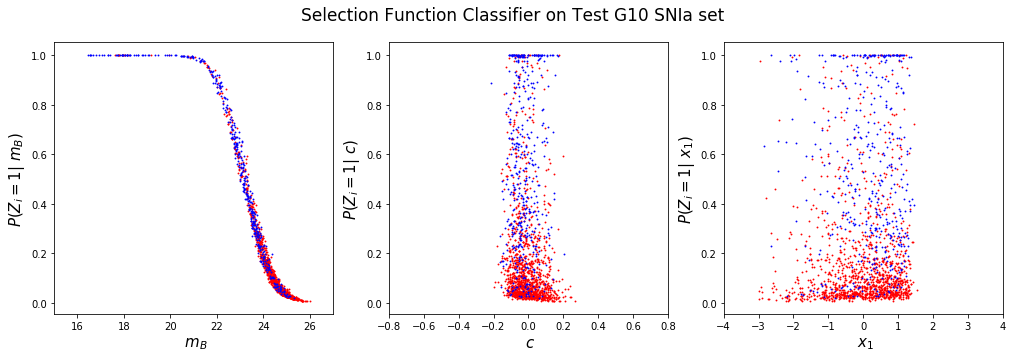

In [6]:
from helper_functions import logreg
for i in range(len(labels)):    
    figpath = '/mnt/c/Users/lucas/repositories/supernova_classification/plots/{}_selectionfunction.png'.format(labels[i][5:])
    logreg.plotSelectionFunction(labels[i], data_all=smearlist[i][0], data_sel=smearlist[i][1], figpath=figpath)

In [7]:
# take a look at coefficients:

for i in range(len(labels)):    
    phi_test,Z_test,coeff_table = logreg.generateCoeffs(data_all=smearlist[i][0], data_sel=smearlist[i][1])
    
    print(labels[i], "\n", coeff_table)

smearC11 
            0                         1
0  Intercept       [39.12021604420634]
1       S2mB      [-1.684209660478683]
2        S2c      [2.3581729937956513]
3       S2x1  [-0.0036850295921430354]
smearG10 
            0                       1
0  Intercept     [39.28415112108327]
1       S2mB    [-1.692291802358028]
2        S2c    [2.1919167217419946]
3       S2x1  [-0.08788735555115926]


In [8]:
def myfun(x, b=None):
    if b is not None:
        return x + b
    else:
        return x

In [10]:
myfun(x=5, b=2)

7